In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
tn_food_access_df = pd.read_csv('../data/tn_food_access_clean.csv')

In [32]:
tn_food_access_df.head()

,ct_long,county,Urban,Pop2010,OHU2010,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,...,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157
0,47001020100,Anderson,1,3111,1546,1381,706,384,1969,853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47001020201,Anderson,1,3670,1535,604,778,658,3158,144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47001020202,Anderson,1,4507,2025,1741,850,1364,3988,194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47001020300,Anderson,1,3822,1656,1077,852,640,3290,278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47001020400,Anderson,1,4508,2013,1995,966,761,3855,264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Saving a CSV to the data folder with population by county. (Also commenting it out so I don't get a new one each time I run the notebook.)

In [33]:
# data.groupby(['month','network_type'])['date'].count()
pop_by_county = tn_food_access_df.groupby(['county'])['Pop2010'].mean()
pop_by_county_df = pd.DataFrame(pop_by_county)
# pop_by_county_to_csv.to_csv('pop_by_county.csv')

In [34]:
pop_by_county_df = pop_by_county_df.reset_index()

In [35]:
pop_by_county_df.head()

,county,Pop2010
0,Anderson,4419.352941
1,Bedford,5006.444444
2,Benton,3297.800000
3,Bledsoe,4292.000000
4,Blount,4393.214286


<Axes: ylabel='Count'>

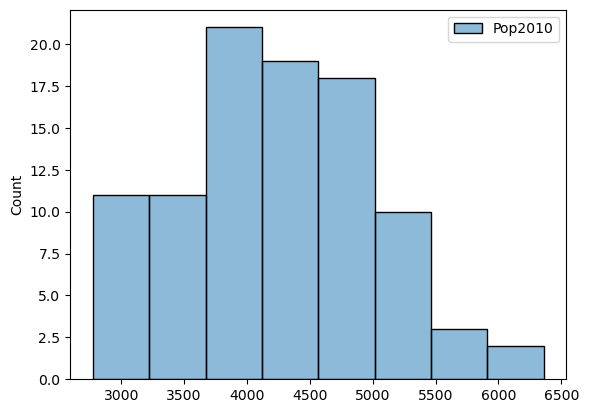

In [36]:
sns.histplot(pop_by_county_df)

Pulling average, median, maximum and minimum population values. 

In [37]:
tn_food_access_df['Pop2010'].mean()

4261.991269308261

The average exceeds median population in Tennessee by about 200 people.

In [38]:
tn_food_access_df['Pop2010'].median()

4059.0

Maximum population in any census tract is 21,763 people in CT 501.01 Williamson County.

Williamson County is just south of Nashville and includes Franklin, TN.

In [39]:
# https://stackoverflow.com/questions/71828530/printing-the-whole-row-of-my-data-from-a-max-value-in-a-column
tn_food_access_df[tn_food_access_df['Pop2010'].iloc[:]==tn_food_access_df['Pop2010'].iloc[:].max()]

,ct_long,county,Urban,Pop2010,OHU2010,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,...,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157
1467,47187051202,Williamson,1,21763,6999,2788,7852,869,19606,990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# https://stackoverflow.com/questions/19442060/matplotlib-pyplot-titlestring-returns-error
# this was a fix for the title error I was getting ("'str' object is not callable")
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

Text(0.5, 1.0, 'Total Population and Housing Units With SNAP')

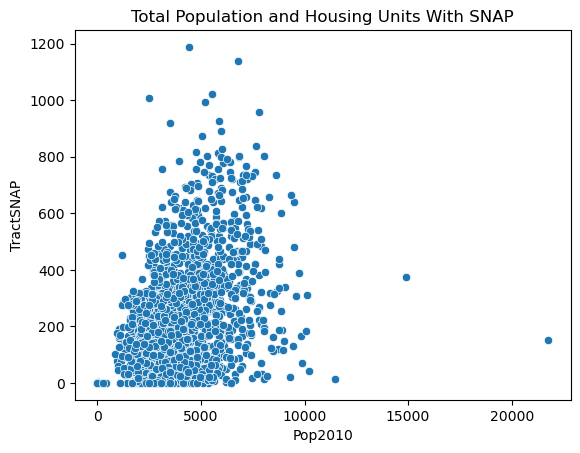

In [41]:
sns.scatterplot(data=tn_food_access_df, x='Pop2010', y='TractSNAP')
plt.title('Total Population and Housing Units With SNAP')

https://forecastegy.com/posts/correlation-between-two-time-series-python/

Text(0.5, 1.0, 'Total Population and Housing Units Without Vehicle Access')

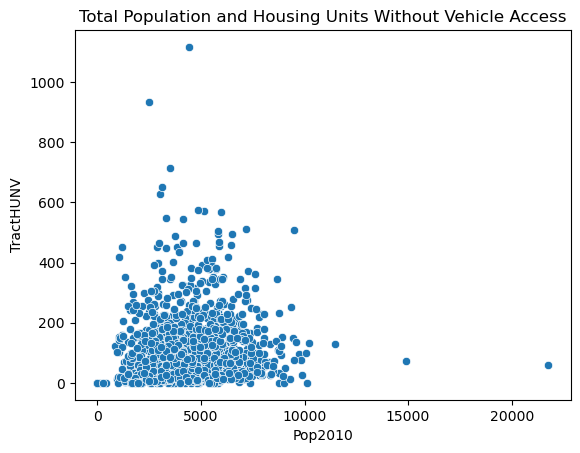

In [42]:
sns.scatterplot(data=tn_food_access_df, x='Pop2010', y='TractHUNV')
plt.title('Total Population and Housing Units Without Vehicle Access')

*** for the flag columns (0 for false and 1 for true), probably best to analyze data flagged for a given variable and compare to data not flagged for the same variable. E.g. population average for tracts with a LILATracts_1And20 flag and population avg for tracts without. ***

Example of why comparing flag columns to columns with a wider range of values may not be effective:

Text(0.5, 1.0, 'Total Population and Low Access/Low Income at 1 Mile Urban and 20 Miles Rural')

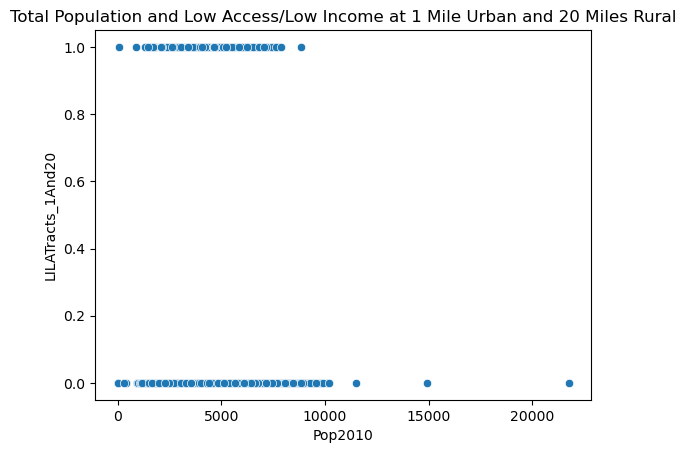

In [43]:
sns.scatterplot(data=tn_food_access_df, x='Pop2010', y='LILATracts_1And20')
plt.title('Total Population and Low Access/Low Income at 1 Mile Urban and 20 Miles Rural')